# Tool of Making the Lattice Network

## Import modules

In [31]:
# import module
import numpy as np
import pandas as pd
import networkx as nx
import json as json

import matplotlib.pyplot as plt
%matplotlib inline

## Functions

In [32]:
# create column function
def create_column(n, tr_row_id):
    link_dic = {}
    node_dic = {}
    for i in range(n):
        node_id = str((tr_row_id-1)*n + i+1)
        node_dic[node_id] = {}
        node_dic[node_id]['x_pos'] = tr_row_id
        node_dic[node_id]['y_pos'] = i+1
        
        next_node_id = str(int(node_id)+1)
        if i < n-1:
            
            link1_id = node_id + '_' + next_node_id
            link2_id = next_node_id + '_' + node_id
            
            link_dic[link1_id] = {}
            link_dic[link1_id]['from_node_id'] = node_id
            link_dic[link1_id]['to_node_id'] = next_node_id

            link_dic[link2_id] = {}
            link_dic[link2_id]['from_node_id'] = next_node_id
            link_dic[link2_id]['to_node_id'] = node_id
            
    return link_dic, node_dic

In [33]:
# add column function
def add_column(n, network_dic, tr_row_id, new_link_dic, new_node_dic):
    
    #add new link_dic, node_dic
    network_dic['link_dic'].update(new_link_dic)
    network_dic['node_dic'].update(new_node_dic)
    
    # connect
    for node_id in new_node_dic.keys():
        left_node_id = str(int(node_id) - n)
        
        link1_id = node_id + '_' + left_node_id
        link2_id = left_node_id + '_' + node_id
            
        network_dic['link_dic'][link1_id] = {}
        network_dic['link_dic'][link1_id]['from_node_id'] = node_id
        network_dic['link_dic'][link1_id]['to_node_id'] = left_node_id

        network_dic['link_dic'][link2_id] = {}
        network_dic['link_dic'][link2_id]['from_node_id'] = left_node_id
        network_dic['link_dic'][link2_id]['to_node_id'] = node_id
        
    return network_dic

In [34]:
# make lattice network function
def make_lattice(n):
    network_dic = {}
    network_dic['link_dic'], network_dic['node_dic'] = create_column(n, 1)
    
    for row_id in range(2,n+1):
        new_link_dic, new_node_dic = create_column(n, row_id)
        network_dic = add_column(n, network_dic, row_id, new_link_dic, new_node_dic)
            
    return network_dic

## Create network data

In [35]:
# Number of nodes in a column (or row)
n = 3
network_dic = make_lattice(n)

In [36]:
# you can save network_dic as json file

save = True
path = 'network.json'
if save:
    f = open(path,'w', encoding='utf-8-sig')
    json.dump(network_dic, f, indent=2)
    f.close()

## Visualize network with nx

In [37]:
G = nx.DiGraph()

In [38]:
for tr_link in network_dic['link_dic'].keys():
    G.add_edge(network_dic['link_dic'][tr_link]['from_node_id'], network_dic['link_dic'][tr_link]['to_node_id'])
    
pos_dic = {tr_node : [network_dic['node_dic'][tr_node]['x_pos'], network_dic['node_dic'][tr_node]['y_pos']] for tr_node in network_dic['node_dic'].keys()}

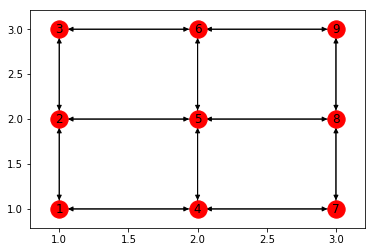

In [39]:
nx.draw_networkx(G, pos=pos_dic)